<a href="https://colab.research.google.com/github/dinachoir/Heart-Disease-Classification/blob/main/Heart_Disease_Multiclass_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Multiclass Classification

## Problem Statement

A heart attack (Cardiovascular diseases) occurs when the flow of blood to the heart muscle suddenly becomes blocked. From WHO statistics every year 17.9 million dying from heart attack. The medical study says that human life style is the main reason behind this heart problem. Apart from this there are many key factors which warns that the person may/maynot getting chance of heart attack.

This dataset contain some medical information of patients which tells whether that person getting a heart attack chance is less or more. Using the information explore the dataset and classify the target variable using neural network models and findout which algorithm suitable for this dataset.

## Data

This dataset gives the information related to heart disease. Dataset contain 13 columns, target is the class variable which is affected by other 12 columns. 

Categorical: sex, cp, fbs, restecg, exang, slope,thal

**Attribute documentation:**
1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
  -- Value 1: typical angina

  -- Value 2: atypical angina

  -- Value 3: non-anginal pain

  -- Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
  -- Value 0: normal

  -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

  -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment

  -- Value 1: upsloping

  -- Value 2: flat

  -- Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: A blood disorder called thalassemia. 3 = normal; 6 = fixed defect; 7 = reversable defect

In [ ]:
# get the data from github
!wget -q https://raw.githubusercontent.com/dinachoir/Heart-Disease-Classification/main/heartdisease.csv

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
data = pd.read_csv('heartdisease.csv', header=None)
data.columns = ['age', 'sex', 'cp', 'trestbps',
        'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca',
        'thal', 'target']
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
data['target'].unique()

array([0, 2, 1, 3, 4])

# Data Exploration

In [ ]:
data.shape

(303, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
# check duplicates
duplicate = data[data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


In [ ]:
data.duplicated().sum()

0

In [ ]:
# handling missing values
data['ca'].fillna(data['ca'].mode()[0], inplace=True)
data['thal'].fillna(data['thal'].mode()[0], inplace=True)

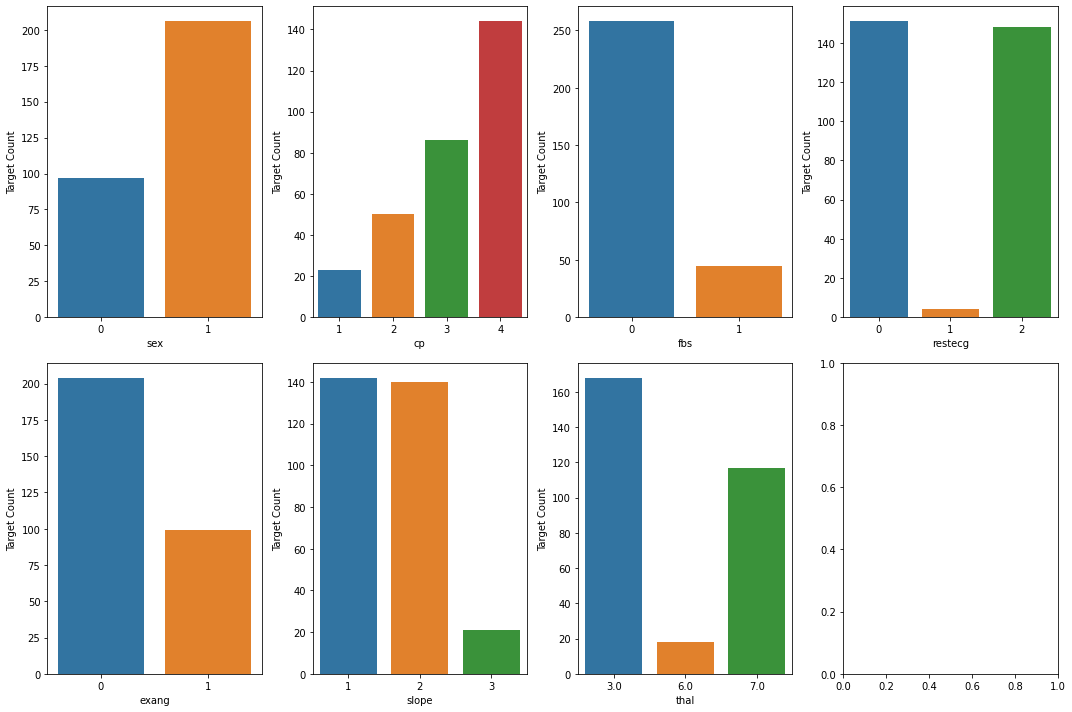

In [ ]:
# Countplot categorical columns

categorical_cols = data[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope','thal']]
fig, ax = plt.subplots(2,4, figsize=(15,10))

for i, col in enumerate(categorical_cols,1):
  plt.subplot(2,4,i)
  sns.countplot(x=col, data=data) # , hue='target'

  plt.xlabel('{}'.format(col))
  plt.ylabel('Target Count')

plt.tight_layout()
plt.show()

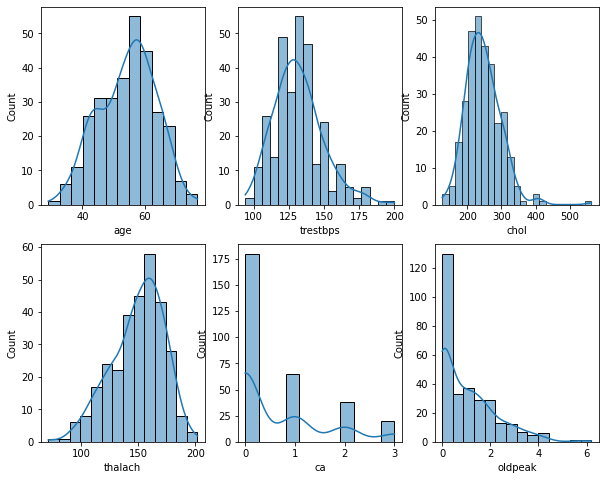

In [ ]:
# plot the distribution of numerical features

numerical_cols = data[['age', 'trestbps','chol', 'thalach','ca','oldpeak']]
fig, ax = plt.subplots(2, 3, figsize=(10,8))

for i, col in enumerate(numerical_cols,1):
    plt.subplot(2,3,i)
    sns.histplot(data=data, x=col, kde=True)
    
plt.show()

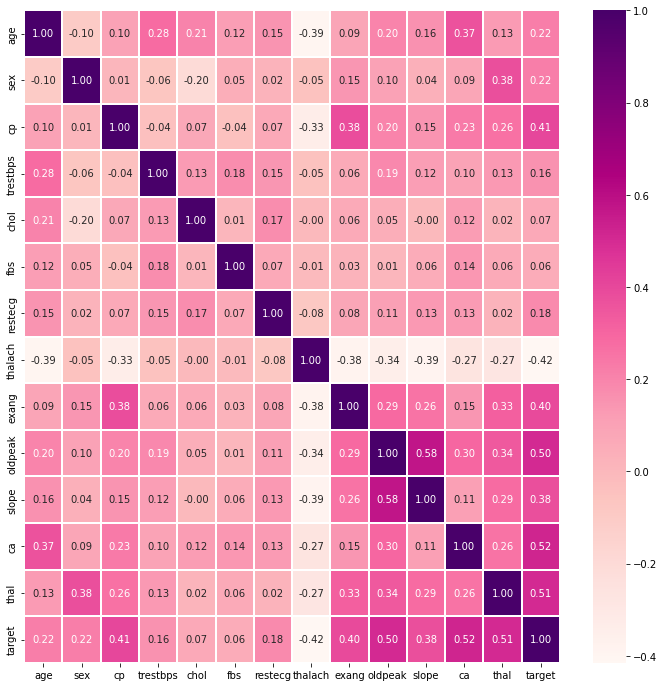

In [ ]:
# visualize correlations
plt.figure(figsize=(12,12))
sns.heatmap(data=data.corr(), annot=True, cmap='RdPu', fmt='.2f', linewidth=1)
plt.show()

In [ ]:
# sort the highest correlated features to the target variable
feature_corr = abs(data.corr()['target']).sort_values(ascending=False)
feature_corr

target      1.000000
ca          0.520968
thal        0.507155
oldpeak     0.504092
thalach     0.415040
cp          0.407075
exang       0.397057
slope       0.377957
sex         0.224469
age         0.222853
restecg     0.183696
trestbps    0.157754
chol        0.070909
fbs         0.059186
Name: target, dtype: float64

# Data Preprocessing

In [ ]:
# splitting dataset

from sklearn.model_selection import train_test_split

X = data.drop(['target','fbs', 'chol', 'trestbps', 'restecg'], axis = 1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
print ('Train set:  ', X_train.shape,  y_train.shape)
print ('Test set:   ', X_test.shape,  y_test.shape)

Train set:   (242, 9) (242,)
Test set:    (61, 9) (61,)


In [ ]:
# Check the min and max values of the training data
X_train.min().min(), X_train.max().max()

(0.0, 202.0)

In [ ]:
# scaling data
X_train = X_train/202.0
X_test = X_test/202.0

# Check the min and max values of the training data
X_train.min().min(), X_train.max().max()

(0.0, 1.0)

# Neural Network Modeling

**Epoch Experiment**

In [ ]:
def fit_model(x_train, y_train, x_test, y_test, epoch):
    # set random seed
    tf.random.set_seed(42)
    
    # define model
    model_1 = tf.keras.Sequential([
        tf.keras.layers.Dense(32, input_dim=9,activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
    ])

    # compile model
    model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])
    
    # fit model
    history = model_1.fit(x_train, y_train, validation_data=(x_test, y_test), 
                          epochs=epoch, batch_size=32, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('Accuracy with epoch='+str(epoch))
    plt.legend(loc='lower right')

In [ ]:
epochz=[50, 100, 150, 200, 250, 300]

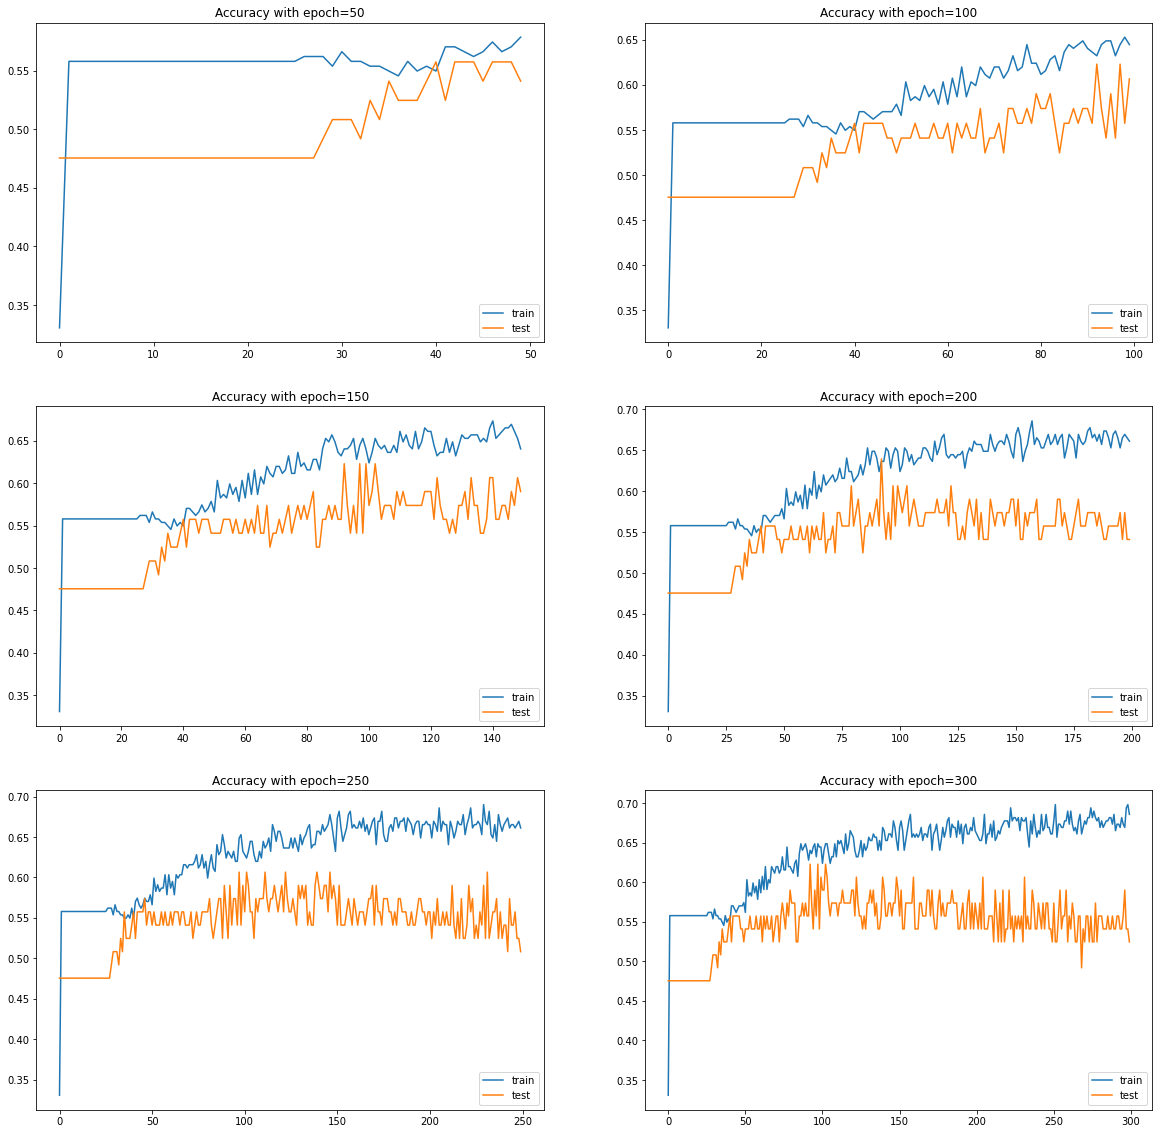

In [ ]:
# with normalized data

plt.figure(figsize=(20,20))
for i in range(len(epochz)):

    plt.subplot(3,2,i+1)
    
    # fit model and plot learning curves for a learning rate
    fit_model(X_train, y_train, X_test, y_test, epochz[i])

# show learning curves
plt.show()

**Findings:**

1. The most effective number of epochs in this case to improve model accuracy is 100.
2. The larger the epoch (150-300) makes the model more overfitting, it can be seen that the distance between the training and testing accuracy graphs is getting farther away.

**Experiment with Batch Size**

In [ ]:
def fit_model_bs(x_train, y_train, x_test, y_test, batch):
    
    # define model
    model_2 = tf.keras.Sequential([
        tf.keras.layers.Dense(32, input_dim=9,activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
    ])
    
    # compile model
    model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['accuracy'])
    
    # fit model
    epoch = 100
    history = model_2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch, batch_size=batch, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('Accuracy with batch_size='+str(batch))
    plt.legend()

In [ ]:
batchz = [8, 16, 32, 64, 128]

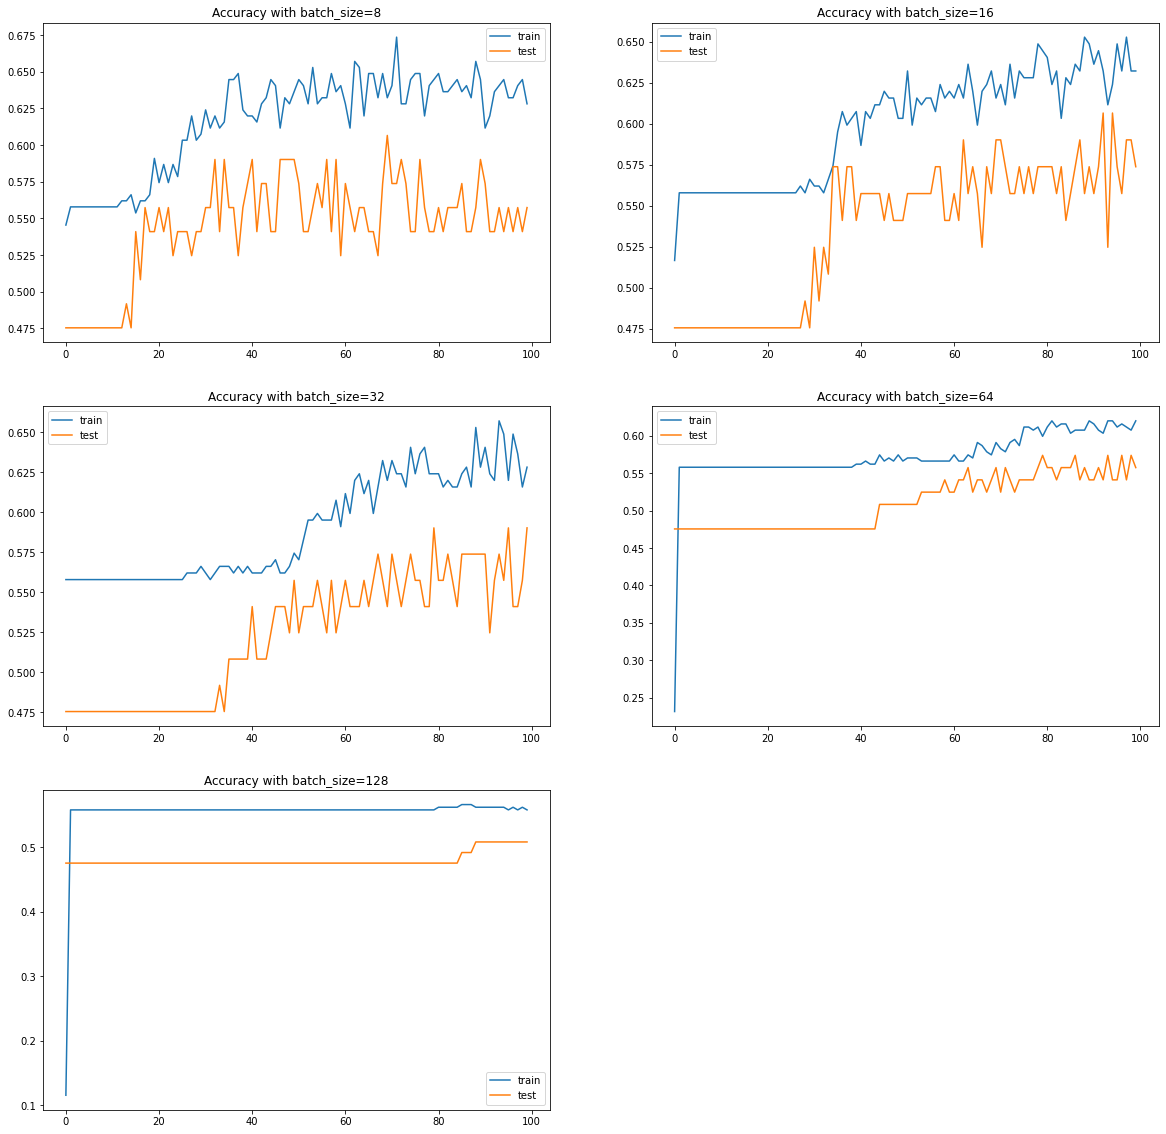

In [ ]:
# with normalized data

plt.figure(figsize=(20, 20))
for i in range(len(batchz)):
    
    plt.subplot(3,2,i+1)
    
    # fit model and plot learning curves for a learning rate
    fit_model_bs(X_train, y_train, X_test, y_test, batchz[i])

# show learning curves
plt.show()

**Findings:**

1. The most effective batch size in this case to improve model accuracy is 32.
2. The lower the batch size (8, 16) the accuracy of the learning process is very volatile (unstable).
3. While the higher the batch size (64, 128) the accuracy of the learning process is more stable, but in this case it does not provide the maximum level of accuracy.

**Experiment with Learning Rate**

In [ ]:
def fit_model_lr(x_train, y_train, x_test, y_test, lr):
    
    # define model
    model_2 = tf.keras.Sequential([
        tf.keras.layers.Dense(32, input_dim=9,activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
    ])
    
    # compile model
    model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                    metrics=['accuracy'])
    
    # fit model
    epoch = 100
    batch = 32
    history = model_2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch, batch_size=batch, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('Accuracy with learning rate='+str(lr))
    plt.legend()

In [ ]:
learning_rt = [1E-1, 1E-2, 1E-3, 1E-4]

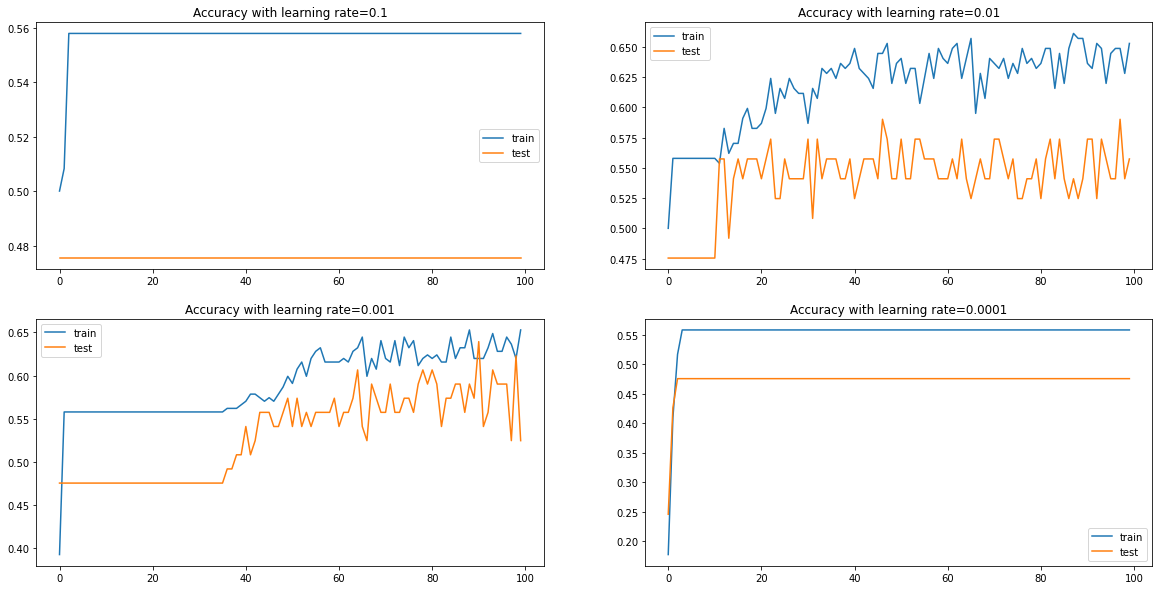

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(len(learning_rt)):
    
    plt.subplot(2,2,i+1)
    
    # fit model and plot learning curves for a learning rate
    fit_model_lr(X_train, y_train, X_test, y_test, learning_rt[i])

# show learning curves
plt.show()

**Evaluate Final Model**

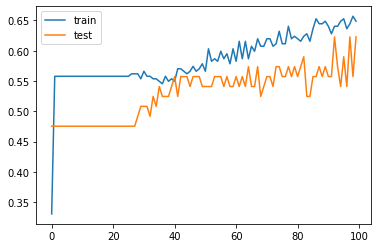

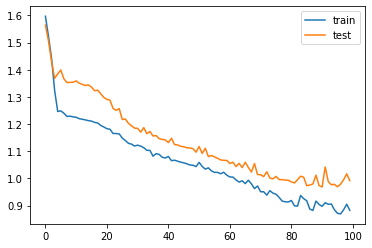

In [ ]:
    # set random seed
    tf.random.set_seed(42)
    
    # define model
    model_1 = tf.keras.Sequential([
        tf.keras.layers.Dense(32, input_dim=9,activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
    ])

    # compile model
    model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['accuracy'])
    
    # fit model
    history = model_1.fit(X_train, 
                          y_train, 
                          validation_data=(X_test, y_test), 
                          batch_size=32,
                          epochs=100, 
                          verbose=0)
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend()
    
    plt.figure()
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()

In [ ]:
# the accuracy of the model
loss, accuracy = model_1.evaluate(X_train, y_train)
print(f"Model loss on train set: {loss}")
print(f"Model accuracy on train set: {(accuracy*100):.2f}%")

loss, accuracy = model_1.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

8/8 [==============================] - 0s 3ms/step - loss: 0.9010 - accuracy: 0.6446
Model loss on train set: 0.9009963274002075
Model accuracy on train set: 64.46%
2/2 [==============================] - 0s 6ms/step - loss: 0.9917 - accuracy: 0.6230
Model loss on test set: 0.9917417168617249
Model accuracy on test set: 62.30%


# Modeling Without Normalizing Data

**Epoch Experiment  (Non-Normalized Data)**

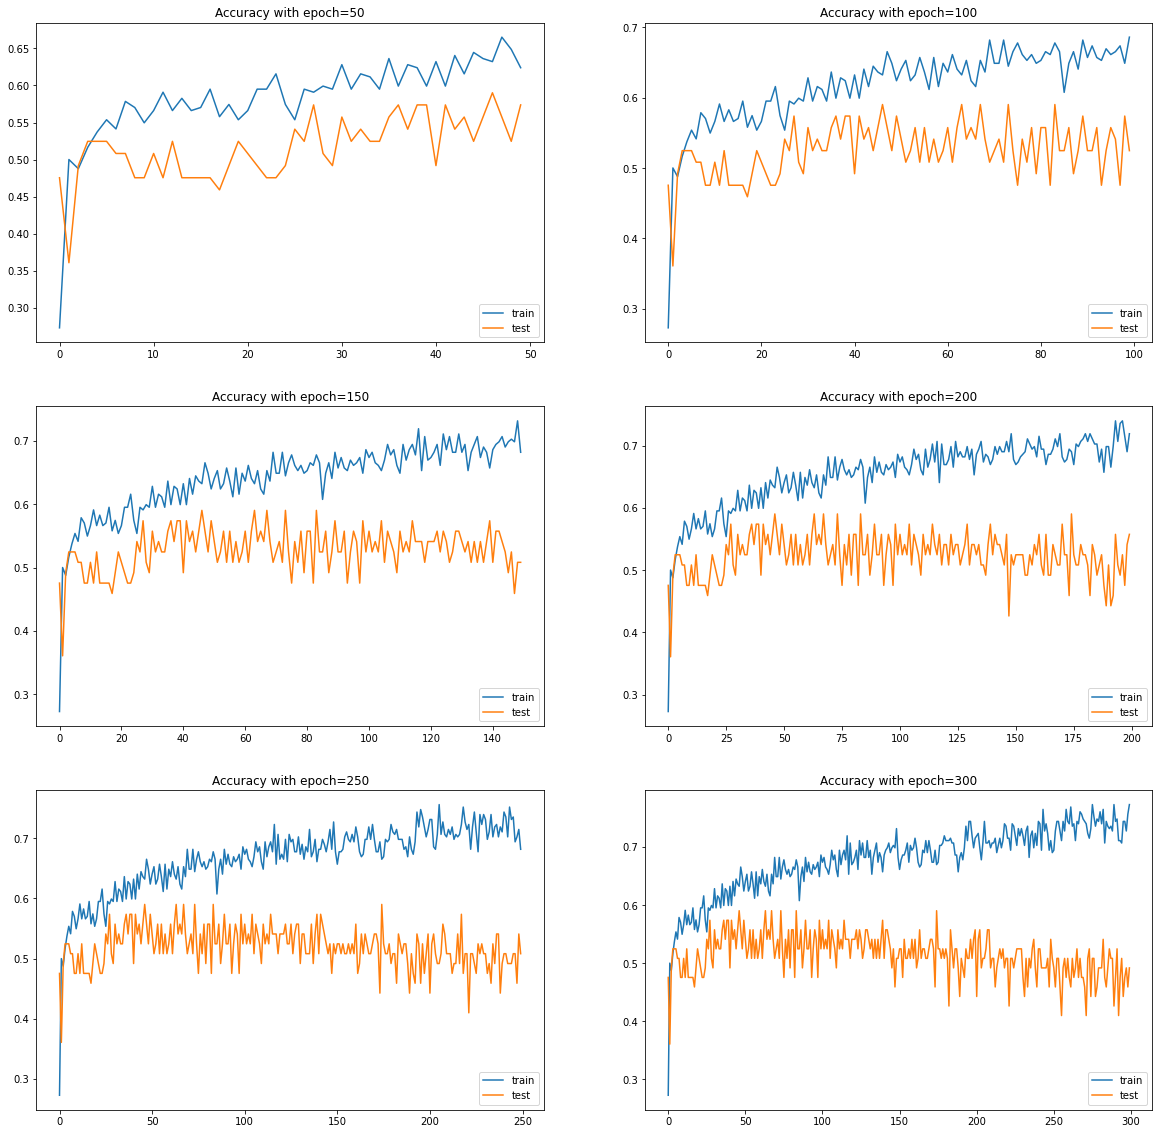

In [ ]:
# Epoch experiment with non-normalized data

plt.figure(figsize=(20,20))
for i in range(len(epochz)):

    plt.subplot(3,2,i+1)
    
    # fit model and plot learning curves for a learning rate
    fit_model(X_train, y_train, X_test, y_test, epochz[i])

# show learning curves
plt.show()

**Findings:**

1. The most effective number of epochs in this case to improve model accuracy is 100.
2. The larger the epoch (150-300) makes the model more overfitting, it can be seen that the distance between the training and testing accuracy graphs is getting farther away.

**Batch Size Experiment  (Non-Normalized Data)**

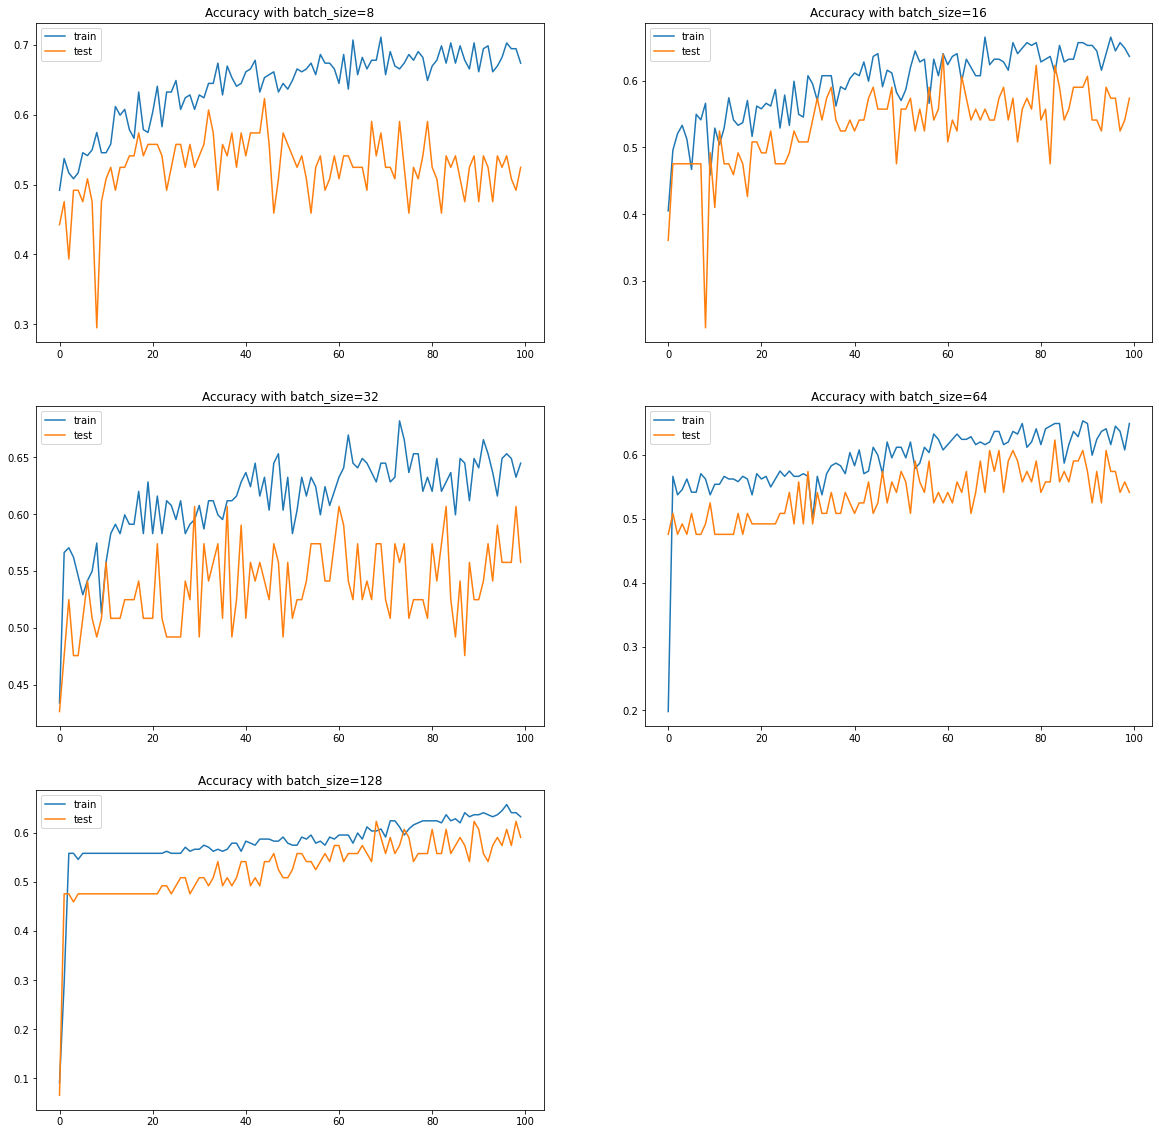

In [ ]:
# Batch Size Experiment with non-normalized data

plt.figure(figsize=(20, 20))
for i in range(len(batchz)):
    
    plt.subplot(3,2,i+1)
    
    # fit model and plot learning curves for a learning rate
    fit_model_bs(X_train, y_train, X_test, y_test, batchz[i])

# show learning curves
plt.show()

**Findings:**

1. The most effective batch size in this case to improve model accuracy is 128.
2. The lower the batch size (8, 16, 32) the accuracy of the learning process is very volatile (unstable).
3. Meanwhile, the higher the batch size (64, 128), the more stable the accuracy of the learning process.

**Learning Rate Experiment (Non-Normalized Data)**

In [ ]:
def fit_model_lr(x_train, y_train, x_test, y_test, lr):
    
    # define model
    model_2 = tf.keras.Sequential([
        tf.keras.layers.Dense(32, input_dim=9,activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
    ])
    
    # compile model
    model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                    metrics=['accuracy'])
    
    # fit model
    epoch = 100
    batch = 128
    history = model_2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch, batch_size=batch, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('Accuracy with learning rate='+str(lr))
    plt.legend()

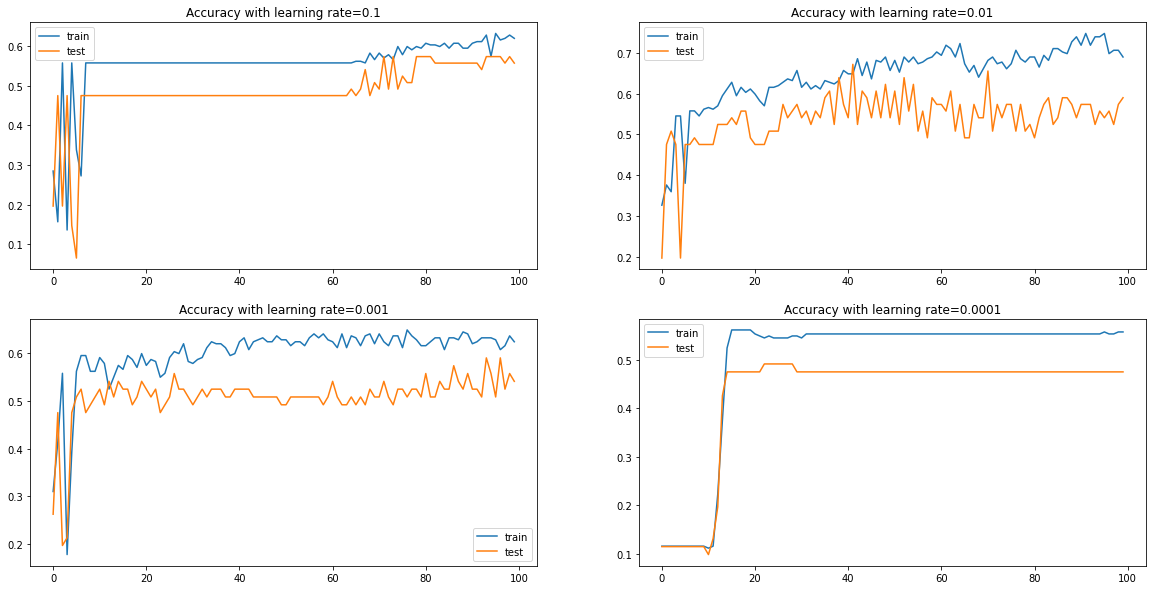

In [ ]:
# Learning Rate Experiment with non_normalized data

plt.figure(figsize=(20, 10))
for i in range(len(learning_rt)):
    
    plt.subplot(2,2,i+1)
    
    # fit model and plot learning curves for a learning rate
    fit_model_lr(X_train, y_train, X_test, y_test, learning_rt[i])

# show learning curves
plt.show()

**Final Model  (Non-Normalized Data)**

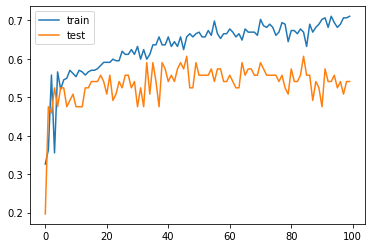

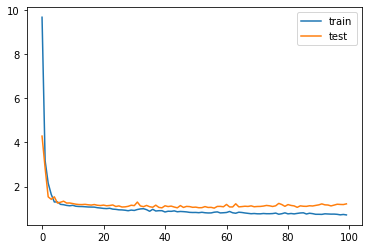

In [ ]:
    # set random seed
    tf.random.set_seed(42)
    
    # define model
    model_2 = tf.keras.Sequential([
        tf.keras.layers.Dense(32, input_dim=9,activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
    ])

    # compile model
    model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=['accuracy'])
    
    # fit model
    history = model_2.fit(X_train, 
                          y_train, 
                          validation_data=(X_test, y_test), 
                          batch_size=128,
                          epochs=100, 
                          verbose=0)
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend()
    
    plt.figure()
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()

**Evaluation Model (Non-Normalized Data)**

In [ ]:
# the accuracy of the model
loss, accuracy = model_2.evaluate(X_train, y_train)
print(f"Model loss on train set: {loss}")
print(f"Model accuracy on train set: {(accuracy*100):.2f}%")

loss, accuracy = model_2.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

8/8 [==============================] - 0s 4ms/step - loss: 0.7177 - accuracy: 0.7149
Model loss on train set: 0.7176697254180908
Model accuracy on train set: 71.49%
2/2 [==============================] - 0s 8ms/step - loss: 1.2143 - accuracy: 0.5410
Model loss on test set: 1.214326024055481
Model accuracy on test set: 54.10%
